<a href="https://colab.research.google.com/github/Mrym17/MachineLearning-with-python/blob/main/Multiclass_SVM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from numpy import math
import matplotlib.pyplot as plt
import seaborn as sns # for plotting.

# **loading dataset**

In [ ]:
data = pd.read_csv('/content/zoo.csv')
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,2,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,3,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,4,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,5,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


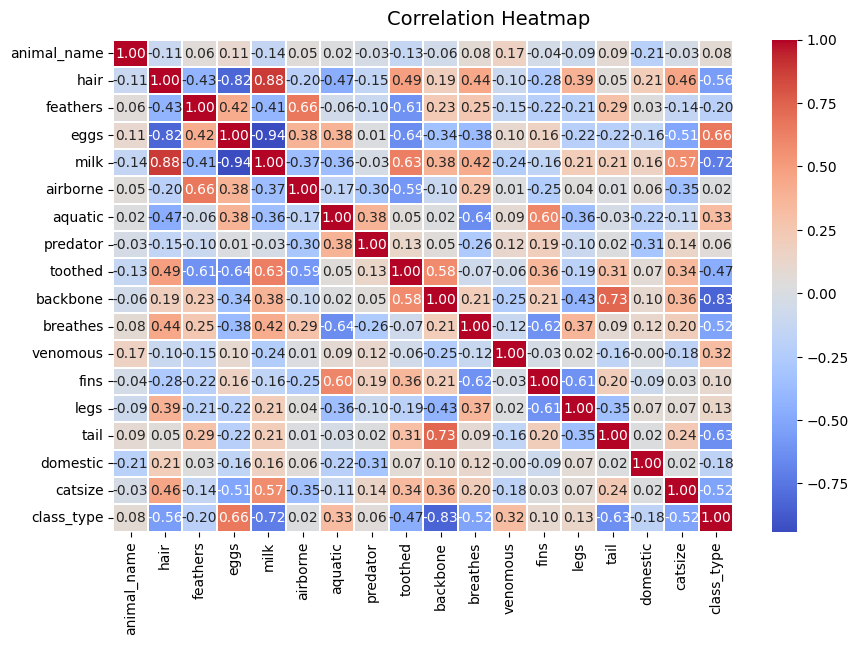

In [ ]:
#correlation
f, ax = plt.subplots(figsize=(10, 6))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

# **Date Preprocessing**

In [ ]:
#checking for redundant data
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [ ]:
#Dropping cloumn Player  as its not a X feature 
data.drop(['animal_name'],inplace=True, axis=1)

In [ ]:
data.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# **Data Split**

In [ ]:
# Split the data into 60% train and 40% test (later will divide the test to test and validate.)
train_dataset, temp_test_dataset =  train_test_split(data, test_size=0.4)

print( train_dataset.shape )
print( temp_test_dataset.shape )

(60, 17)
(41, 17)


In [ ]:
# Split the test_dataset dataframe to 50% test and 50% validation. [this will divide the dataset into 60% train, 20% validate, and 20% test]
test_dataset, valid_dataset =  train_test_split(temp_test_dataset, test_size=0.5)
print( test_dataset.shape )
print( valid_dataset.shape )

(20, 17)
(21, 17)


In [ ]:
print(f"Display the datatype of the test_dataset: {type(test_dataset)}")
print(f" Trai dataset       : {train_dataset.shape}")
print(f" Test dataset       : {test_dataset.shape}")
print(f" Validation dataset : {valid_dataset.shape}")

Display the datatype of the test_dataset: <class 'pandas.core.frame.DataFrame'>
 Trai dataset       : (60, 17)
 Test dataset       : (20, 17)
 Validation dataset : (21, 17)


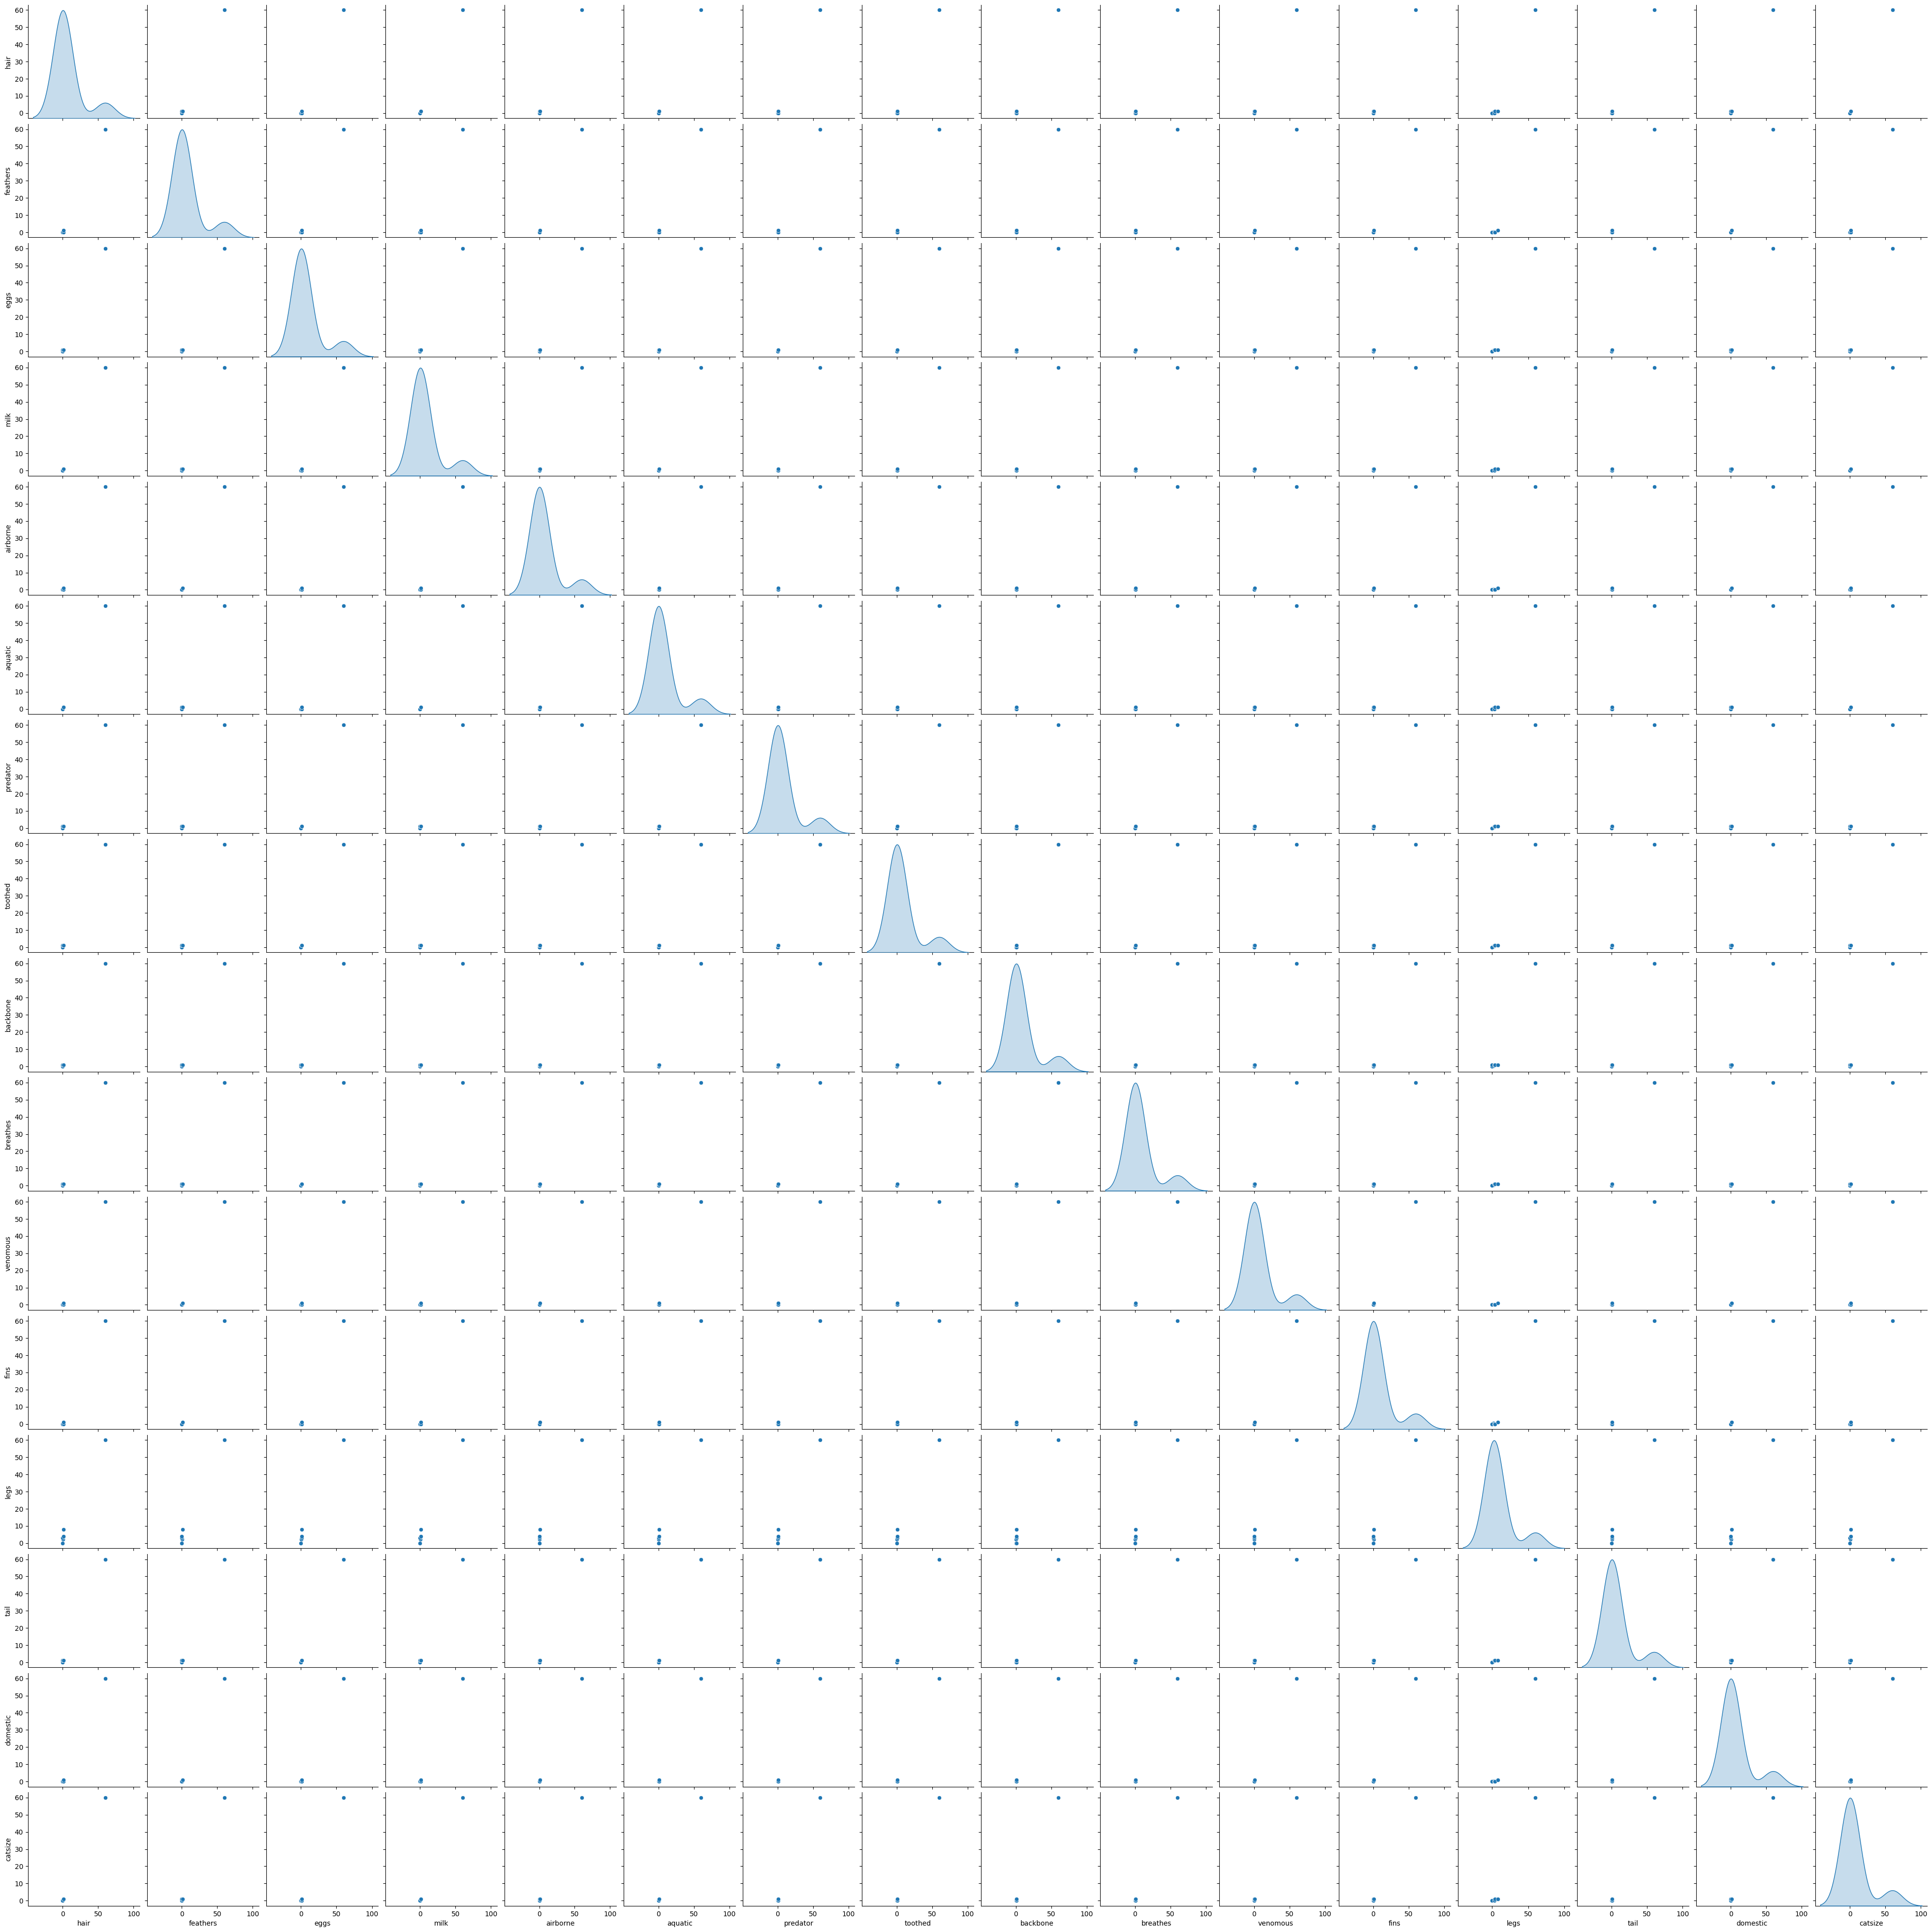

In [ ]:
# Plot the relationship between each two variables to spot anything incorrect.
train_stats = train_dataset.describe()
train_stats.pop("class_type")
sns.pairplot(train_stats[train_stats.columns], diag_kind="kde") # or diag_kind='reg'

In [ ]:
# Statistics on the train dataset to make sure it is in a good shape. (you may display the same stat for test and validate)
train_stats = train_dataset.describe()
train_stats.pop("class_type")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
hair,60.0,0.383333,0.490301,0.0,0.0,0.0,1.0,1.0
feathers,60.0,0.166667,0.375823,0.0,0.0,0.0,0.0,1.0
eggs,60.0,0.650000,0.480995,0.0,0.0,1.0,1.0,1.0
milk,60.0,0.350000,0.480995,0.0,0.0,0.0,1.0,1.0
airborne,60.0,0.233333,0.426522,0.0,0.0,0.0,0.0,1.0
aquatic,60.0,0.350000,0.480995,0.0,0.0,0.0,1.0,1.0
predator,60.0,0.550000,0.501692,0.0,0.0,1.0,1.0,1.0
toothed,60.0,0.583333,0.497167,0.0,0.0,1.0,1.0,1.0
backbone,60.0,0.783333,0.415450,0.0,1.0,1.0,1.0,1.0
breathes,60.0,0.733333,0.445948,0.0,0.0,1.0,1.0,1.0


In [ ]:
train_labels = train_dataset.pop('class_type')
test_labels = test_dataset.pop('class_type')
valid_labels = valid_dataset.pop('class_type')

# **Data Normalization/Scaling**

**Subtract the mean of the training data and divide by the standard deviation of the training data.**

In [ ]:
# define a function to normalize the data set.
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_valid_dataset = norm(valid_dataset)

In [ ]:
# show a sample of the data after normalized
normed_train_data.head(10)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
5,1.257730,-0.443471,-1.351366,1.351366,-0.547061,-0.727659,-1.096290,0.838082,0.521523,0.597976,-0.265025,-0.469839,0.546726,0.623506,-0.388950,1.351366
62,-0.781832,-0.443471,0.727659,-0.727659,-0.547061,-0.727659,0.896965,0.838082,0.521523,0.597976,3.710346,-0.469839,-1.250730,0.623506,-0.388950,-0.727659
70,1.257730,-0.443471,-1.351366,1.351366,-0.547061,-0.727659,-1.096290,0.838082,0.521523,0.597976,-0.265025,-0.469839,0.546726,0.623506,2.528175,1.351366
73,-0.781832,-0.443471,0.727659,-0.727659,-0.547061,1.351366,-1.096290,0.838082,0.521523,-1.644435,-0.265025,2.092917,-1.250730,0.623506,-0.388950,-0.727659
63,1.257730,-0.443471,0.727659,1.351366,-0.547061,1.351366,0.896965,-1.173314,0.521523,0.597976,-0.265025,-0.469839,0.546726,0.623506,-0.388950,1.351366
54,1.257730,-0.443471,-1.351366,1.351366,-0.547061,-0.727659,0.896965,0.838082,0.521523,0.597976,-0.265025,-0.469839,0.546726,0.623506,-0.388950,-0.727659
25,-0.781832,-0.443471,0.727659,-0.727659,-0.547061,1.351366,0.896965,0.838082,0.521523,0.597976,-0.265025,-0.469839,0.546726,-1.577103,-0.388950,-0.727659
29,1.257730,-0.443471,-1.351366,1.351366,-0.547061,-0.727659,0.896965,0.838082,0.521523,0.597976,-0.265025,-0.469839,-0.352002,-1.577103,2.528175,1.351366
56,-0.781832,2.217356,0.727659,-0.727659,-0.547061,-0.727659,-1.096290,-1.173314,0.521523,0.597976,-0.265025,-0.469839,-0.352002,0.623506,-0.388950,1.351366
42,-0.781832,-0.443471,0.727659,-0.727659,1.797485,-0.727659,0.896965,-1.173314,-1.885505,0.597976,-0.265025,-0.469839,1.445454,-1.577103,-0.388950,-0.727659


# **Train the model**

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=1, C=1)

#Train the model using the training sets
rbf.fit(normed_train_data, train_labels)

#Predict the response for test dataset
y_pred = rbf.predict(normed_test_data)

In [ ]:
example_batch = normed_test_data[:10]
example_result = rbf.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([1, 1, 7, 1, 1, 1, 1, 2, 1, 1])

In [ ]:
poly = svm.SVC(kernel='poly', degree=3, C=1)

#Train the model using the training sets
poly.fit(normed_train_data, train_labels)


#Predict the response for test dataset
y_pred = poly.predict(normed_test_data)

In [ ]:
example_batch = normed_test_data[:10]
example_result = poly.predict(example_batch)
print('predicted values: ')
example_result

predicted values: 


array([4, 1, 7, 1, 1, 1, 1, 2, 1, 1])

# **Model Accuracy**

In [ ]:
from sklearn import metrics
y_pred = rbf.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 1.0


In [ ]:
from sklearn import metrics
y_pred = poly.predict(normed_train_data)
print("Accuracy:",metrics.accuracy_score(train_labels, y_pred))

Accuracy: 0.9166666666666666


In [ ]:
y_pred = rbf.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 0.7619047619047619


In [ ]:
y_pred = poly.predict(normed_valid_dataset)
print("Accuracy:",metrics.accuracy_score(valid_labels, y_pred))

Accuracy: 0.8571428571428571


In [ ]:
y_pred = rbf.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.65


In [ ]:
y_pred = poly.predict(normed_test_data)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.95


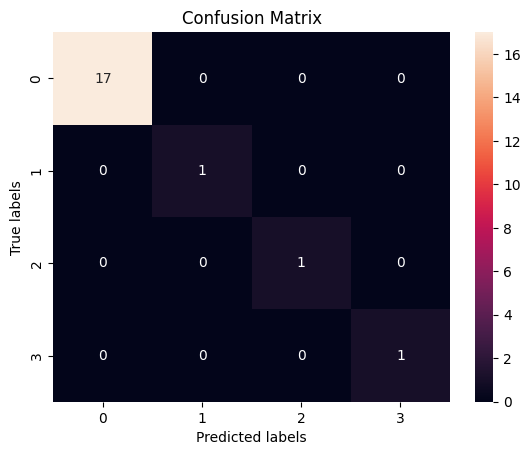

In [ ]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = rbf.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);

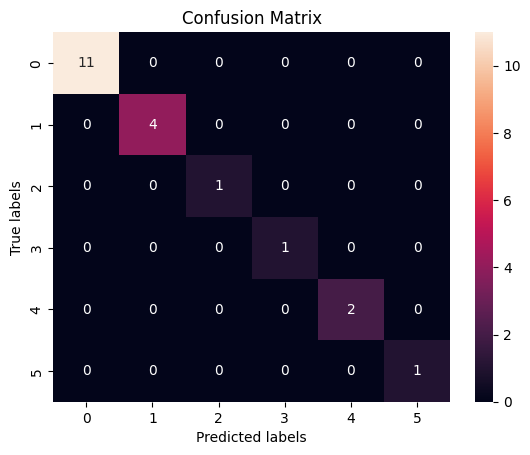

In [ ]:
from sklearn.metrics import confusion_matrix


ax= plt.subplot()
predict_results = poly.predict(normed_test_data)

cm = confusion_matrix(predict_results, predict_results)

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
# ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);